<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 8</h1>

In [2]:
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras import layers, activations

from keras.layers import Input, Flatten, Dense, Rescaling, MaxPooling2D, Conv2D, Dropout

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Data augmentation</h1>

L'obiettivo di questo esercizio è vedere in azione la tecnica del "data augmentation", che consente di aumentare artificialmente la quantità di dati disponibili per l'addestramento di un modello, senza che debbano essere raccolti nuovi dati reali. Questo consente di migliorare la performance del modello ed allo stesso tempo di ridurre il rischio di overfitting (in quanto è più difficile che il modello impari troppo bene i dati d'addestramento). Nel campo delle immagini solitamente per aumentare la dimensione del campione si fa uso di:

- rotazioni

- riflessioni

- zoom o ritagli

- variazioni di luminosità o contrasto

- traslazioni

- aggiunta di rumore

Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.


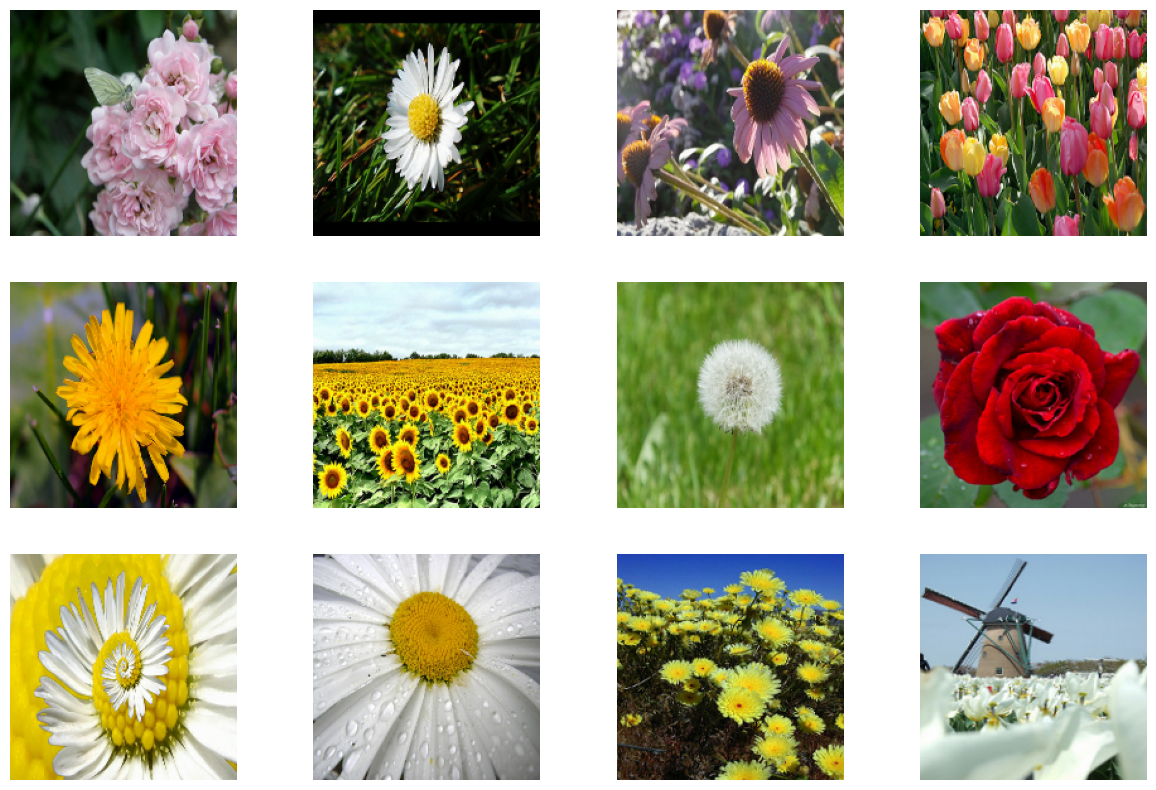

2025-06-30 20:52:40.381459: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)
Dimensione batch foto:  (32, 180, 180,

In [ ]:
def builMod(imH, imW, numcl):
    # Funzione per costruire il modello in questione. 

    model = keras.Sequential()
    model.add(Rescaling(1./255, input_shape=(imH, imW, 3)))

    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))

    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(numcl, activation = 'softmax'))
    
    return model


# Come primo step per la risoluzione dell'esercizio importo il dataset sul quale vogliamo allenare una 
# rete neurale pensata per risolvere un problema di classificazione. Nello specifico sono 3670 immagini 
# di fiori, ciascuna delle quali è un tensore tridimensionale di (180, 180, 3) pixel. Per caricare il 
# dataset scarichiamo una cartella compressa e la decomprimiamo. Il metodo keras.utils.get_file restituisce 
# il percorso alla cartella in cui si trovano i file estratti, di modo che lo si possa fornire a .Path(), 
# che è un metodo di pathlib, una libreria utile per gestire i percorsi dei file.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


# Vogliamo ora procedere con il caricamento del dataset mediante keras.utils.image_dataset_from_directory
# che restituisce un tf.data.Dataset, che può essere alimentato direttamente nel modello per l'addestramento. 
# E' fondamentale specificare la validation_split, ossia la frazione di dati che vanno a costituire il training 
# e la validation.
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training",
    seed=0, image_size=(180, 180), batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation",
    seed=0, image_size=(180, 180), batch_size=32
)


# Stampo immagini di fiori per visualizzare parte del dataset
for im, lab in train_ds.take(1):
    plt.figure(figsize=(15, 10))

    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(im[i].numpy().astype("uint8"))
        plt.axis("off")

    plt.show()

# Stampo dimensioni dei vari batch  
for imB, labB in train_ds:
    print("Dimensione batch foto: ", imB.shape)
    print("Dimensione batch labels: ", labB.shape)
    break